In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('./resources/fluorine_for_analysis.csv')
print(df)
df.loc[:, ['24h_RET', '1h_RET', '6h_RET']].mean().to_numpy()

     24h_RET    24h_EXT     24h_EM    24h_SRT     1h_RET     1h_EXT  \
0  35.550000  12.233333   9.166667   8.616667  66.116667  28.050000   
1  55.300000  10.283333   8.883333  43.900000  45.566667  19.166667   
2  37.783333  20.300000  38.050000  61.950000  62.216667  25.566667   
3  43.616667   0.000000   8.066667  14.983333  44.166667  16.666667   

       1h_EM     1h_SRT     6h_RET     6h_EXT      6h_EM  
0  17.500000  36.391667  26.666667  12.516667  19.983333  
1  39.733333  39.166667  33.900000  36.683333   7.483333  
2  36.116667  43.466667  65.566667  46.100000  33.900000  
3  22.216667  33.333333  39.150000  17.783333  33.883333  


array([43.0625    , 54.51666667, 41.32083334])

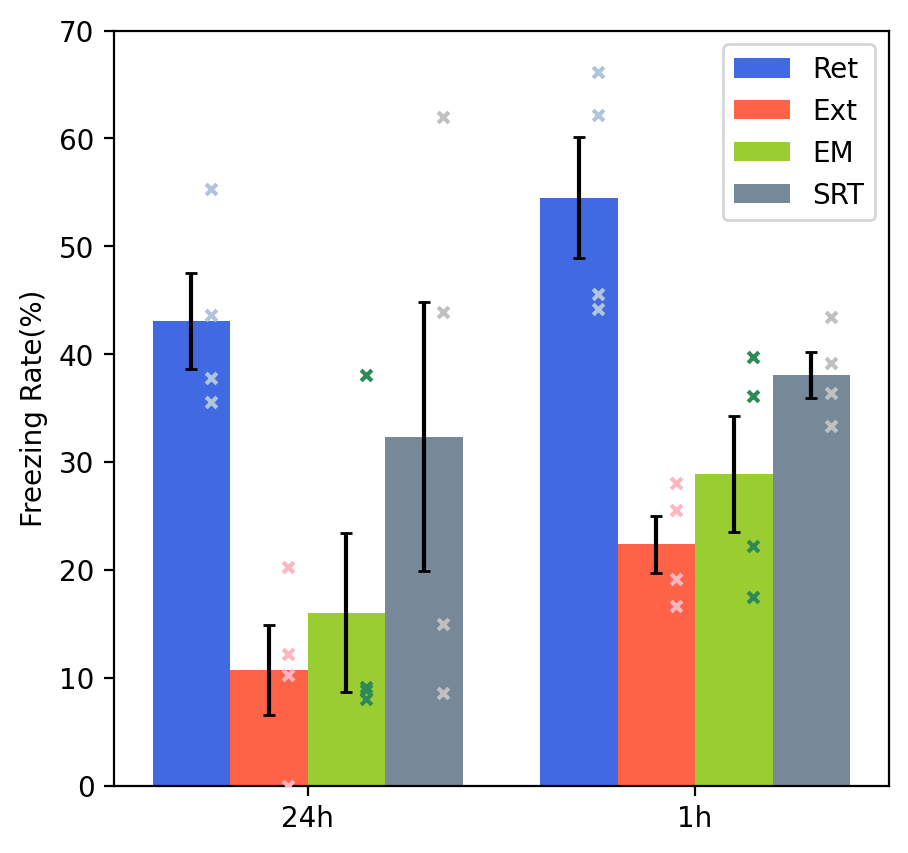

In [86]:
labels = np.array(['24h', '1h'])

ret = df.loc[:, ['24h_RET', '1h_RET']]
ext = df.loc[:, ['24h_EXT', '1h_EXT']]
em  = df.loc[:, ['24h_EM', '1h_EM']]
srt = df.loc[:, ['24h_SRT', '1h_SRT']]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()
srt_mean, srt_sem = srt.mean(), srt.sem()

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.bar(x=left + (width * 2), height=srt_mean, yerr=srt_sem, capsize=2, width=width, label='SRT', align='center', color='lightslategray')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.25] * 4, ret.loc[:, '24h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([-0.05] * 4, ext.loc[:, '24h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.15] * 4, em.loc[:, '24h_EM'], c='seagreen', zorder=12, s=15, marker='x')
plt.scatter([0.35] * 4, srt.loc[:, '24h_SRT'], c='silver', zorder=12, s=15, marker='x')

plt.scatter([0.75] * 4, ret.loc[:, '1h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.95] * 4, ext.loc[:, '1h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([1.15] * 4, em.loc[:, '1h_EM'], c='seagreen', zorder=12, s=15, marker='x')
plt.scatter([1.35] * 4, srt.loc[:, '1h_SRT'], c='silver', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Freezing Rate(%)')
ax.legend()
fig.show()

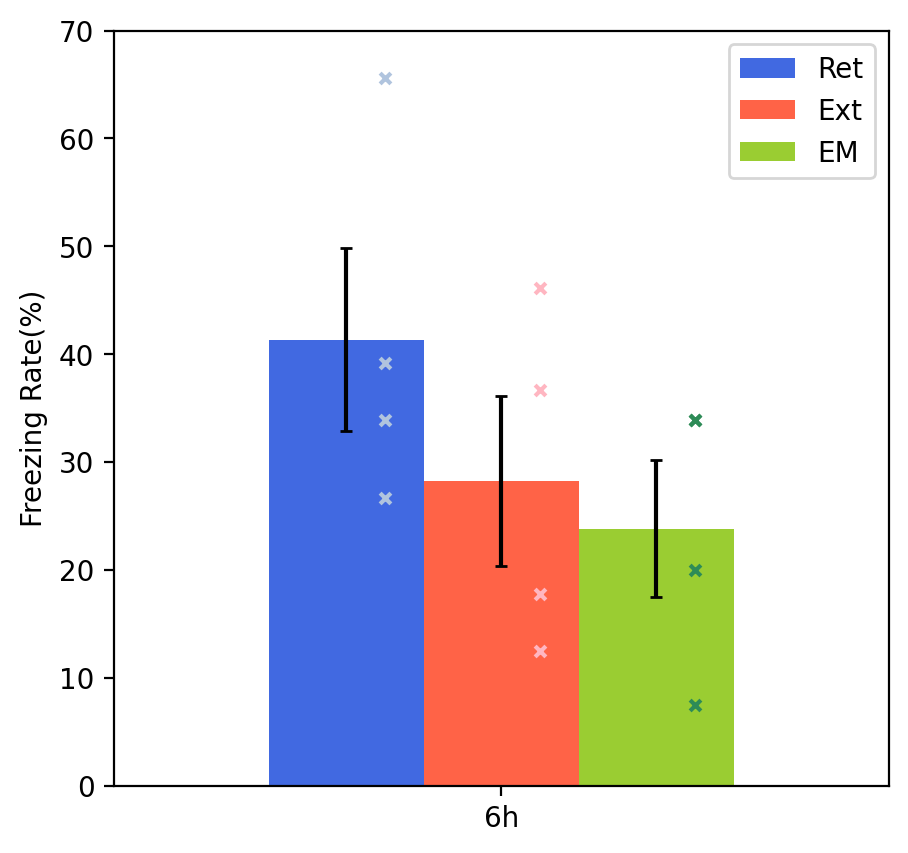

In [87]:
labels = np.array(['6h'])

ret = df.loc[:, ['6h_RET']]
ext = df.loc[:, ['6h_EXT']]
em  = df.loc[:, ['6h_EM']]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()

left = 0
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.set_xticks([0.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.15] * 4, ret.loc[:, '6h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.05] * 4, ext.loc[:, '6h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.25] * 4, em.loc[:, '6h_EM'], c='seagreen', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 0.5)
ax.set_ylabel('Freezing Rate(%)')
ax.legend()
fig.show()

In [8]:
df_6h = df.loc[:, ['6h_RET', '6h_EXT', '6h_EM']]
df_6h

,6h_RET,6h_EXT,6h_EM
0,26.666667,12.516667,19.983333
1,33.900000,36.683333,7.483333
2,65.566667,46.100000,33.900000
3,39.150000,17.783333,33.883333


In [9]:
df_6h.mean()

6h_RET    41.320833
6h_EXT    28.270833
6h_EM     23.812500
dtype: float64

In [89]:
df_6h = pd.read_csv('./resources/24h_result.csv')
df_6h.set_axis(['#1', '#2', '#3', '#4'], axis=0, inplace=True)
df_6h

,RET,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EM
#1,35.550000,13.300000,10.550000,25.816667,10.266667,10.300000,12.233333,9.166667
#2,55.300000,20.533333,17.233333,6.933333,6.666667,1.383333,10.283333,8.883333
#3,37.783333,43.333333,65.000000,18.316667,31.950000,32.783333,20.300000,38.050000
#4,43.616667,15.283333,7.500000,6.950000,3.616667,4.450000,0.000000,8.066667


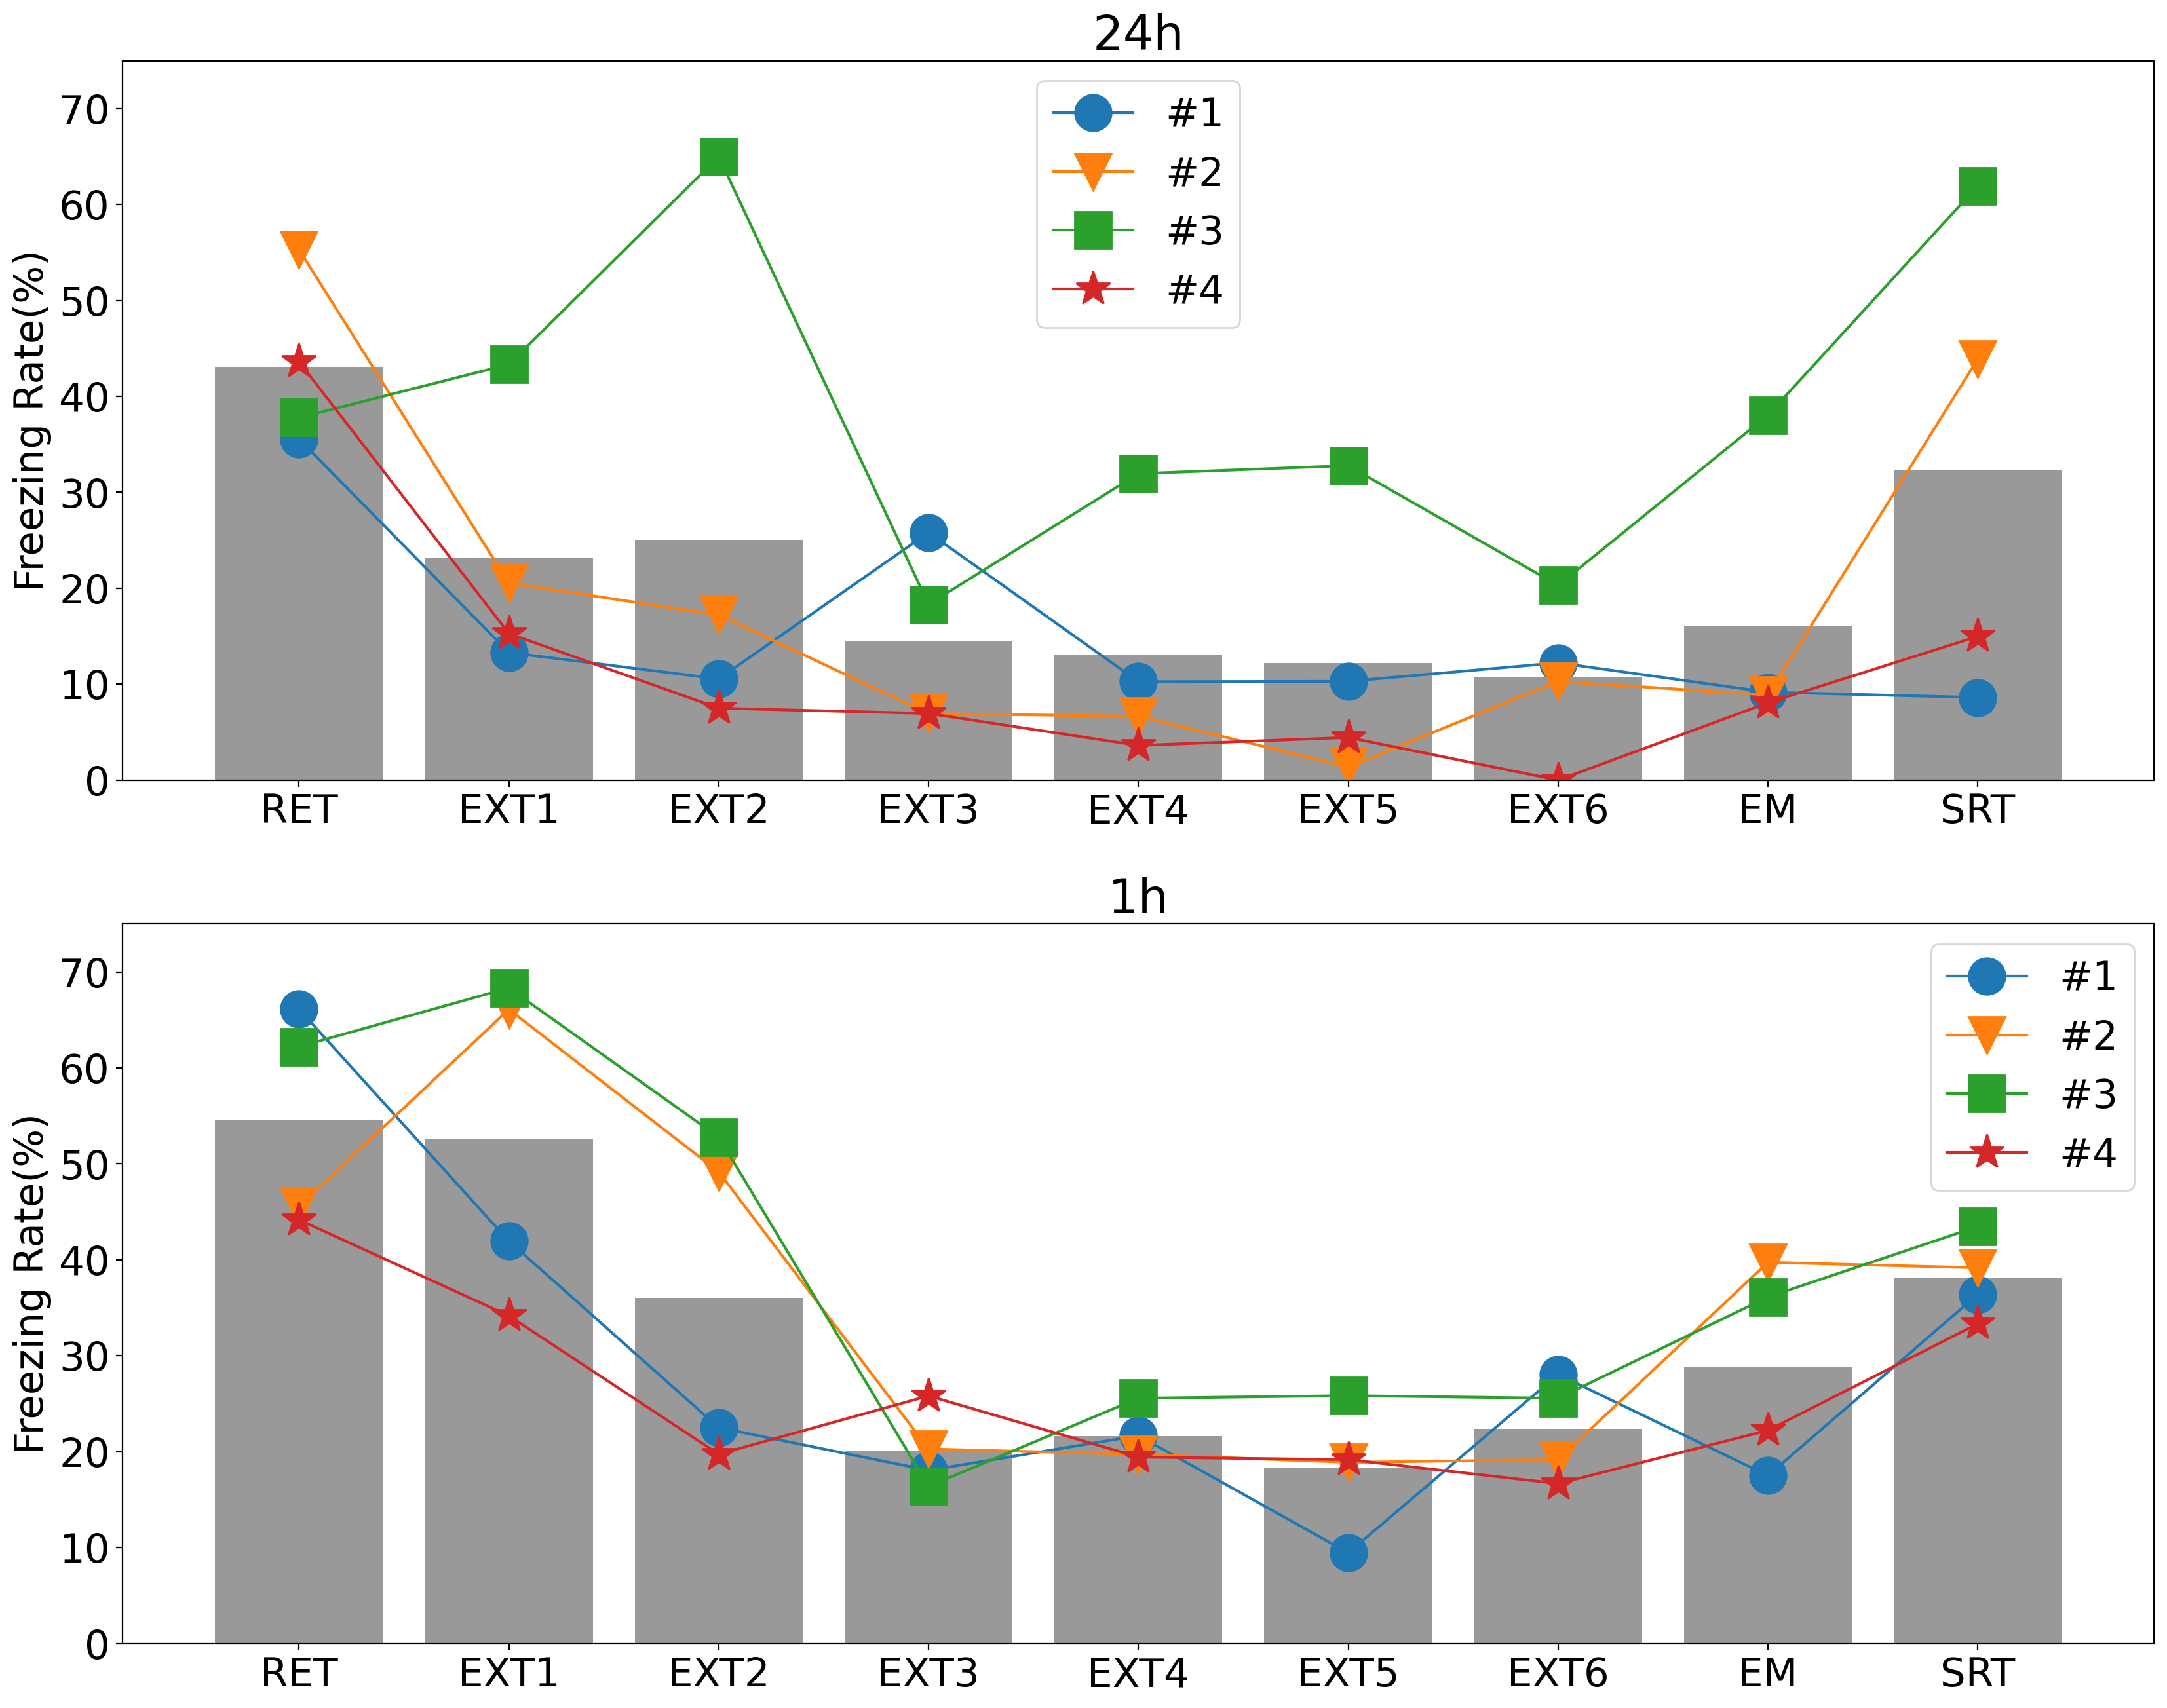

In [109]:
fig, axes = plt.subplots(2, figsize=(20, 16), dpi=200)
iteritems = ['24h', '1h']
for index, interval in enumerate(iteritems):
    ax = axes[index]
    file_path = './resources/%s_result.csv' % interval
    session_df = pd.read_csv(file_path)
    session_df.set_axis(['#1', '#2', '#3', '#4'], axis=0, inplace=True)
    x = session_df.columns
    makers = ['o', 'v', 's', '*']
    for index, animal_number in enumerate(session_df.index):
        y = session_df.loc[animal_number, :]
        ax.plot(x, y, label=animal_number, marker=makers[index], markersize=20.0)
    
    means = session_df.mean()
    bar_color = '0.6'
    ax.bar(x=0.0, height=means['RET'], color=bar_color)
    ax.bar(x=1.0, height=means['EXT1'], color=bar_color)
    ax.bar(x=2.0, height=means['EXT2'], color=bar_color)
    ax.bar(x=3.0, height=means['EXT3'], color=bar_color)
    ax.bar(x=4.0, height=means['EXT4'], color=bar_color)
    ax.bar(x=5.0, height=means['EXT5'], color=bar_color)
    ax.bar(x=6.0, height=means['EXT6'], color=bar_color)
    ax.bar(x=7.0, height=means['EM'], color=bar_color)
    ax.bar(x=8.0, height=means['SRT'], color=bar_color)
    
    ax.set_title(interval)
    ax.set_ylabel('Freezing Rate(%)')
    ax.set_ylim(0, 75)
    
    ax.legend()
plt.show()

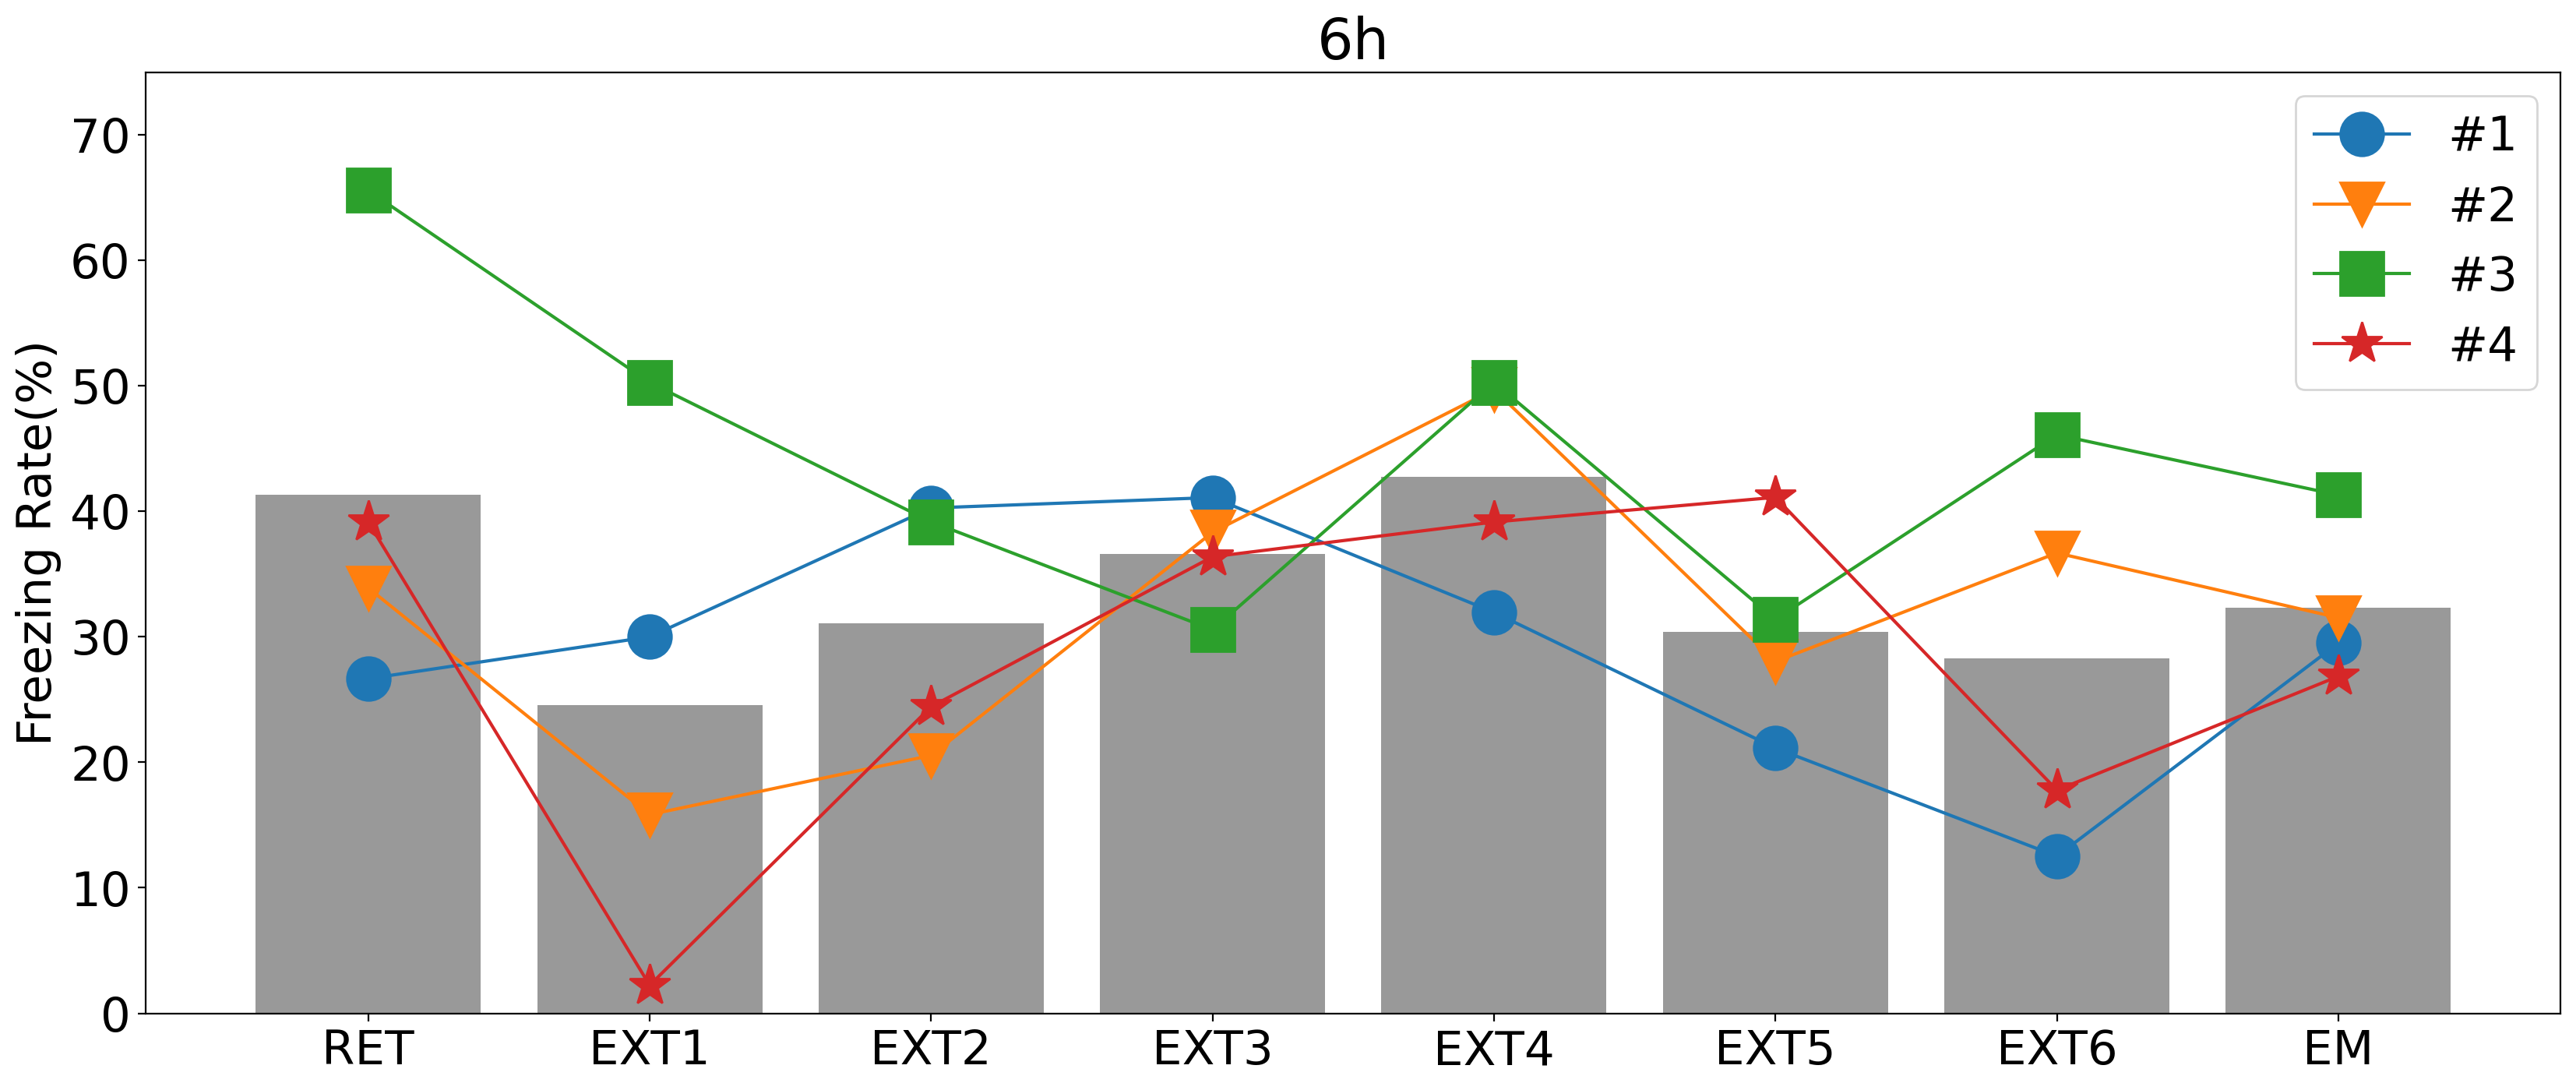

In [114]:
fig, ax = plt.subplots(1, figsize=(20, 8), dpi=200)
file_path = './resources/6h_result.csv'
session_df = pd.read_csv(file_path)
session_df.set_axis(['#1', '#2', '#3', '#4'], axis=0, inplace=True)
x = session_df.columns
makers = ['o', 'v', 's', '*']
for index, animal_number in enumerate(session_df.index):
    y = session_df.loc[animal_number, :]
    ax.plot(x, y, label=animal_number, marker=makers[index], markersize=20.0)
    
means = session_df.mean()
bar_color = '0.6'
ax.bar(x=0.0, height=means['RET'], color=bar_color)
ax.bar(x=1.0, height=means['EXT1'], color=bar_color)
ax.bar(x=2.0, height=means['EXT2'], color=bar_color)
ax.bar(x=3.0, height=means['EXT3'], color=bar_color)
ax.bar(x=4.0, height=means['EXT4'], color=bar_color)
ax.bar(x=5.0, height=means['EXT5'], color=bar_color)
ax.bar(x=6.0, height=means['EXT6'], color=bar_color)
ax.bar(x=7.0, height=means['EM'], color=bar_color)

ax.set_title('6h')
ax.set_ylabel('Freezing Rate(%)')
ax.set_ylim(0, 75)
    
ax.legend()
plt.show()